In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset
df = pd.read_csv("./raw_data/marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [5]:
# Check any null values in the dataset
df.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [6]:
# Get the total numer of rows and columns
df.shape

(588101, 6)

In [7]:
# Check the data type of the columns
df.dtypes

user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [8]:
#Check if there's any duplicate rows in the dataset
df['user id'].nunique()

588101

In [9]:
# Get the categorical columns and their unique values
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
# Get the unique elements for each categorical column
for col in df_cat.columns:
    print(f"{col}: {df_cat[col].unique()}")

test group: ['ad' 'psa']
converted: [False  True]
most ads day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour: [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Univariate Analysis

Text(0.5, 1.0, 'Pie-chart of test group')

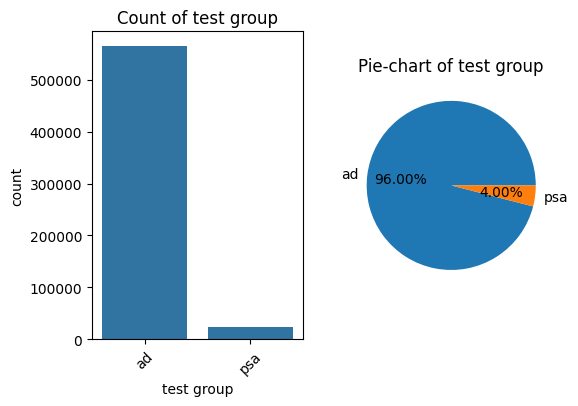

In [11]:
variable ='test group'

plt.figure(figsize = (6,4))

#Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, order=df_cat[variable].value_counts().index ,data=df_cat)
plt.title(f"Count of {variable}")
plt.xticks(rotation=45)

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title('Pie-chart of ' + variable)

Text(0.5, 1.0, 'Pie-chart of converted')

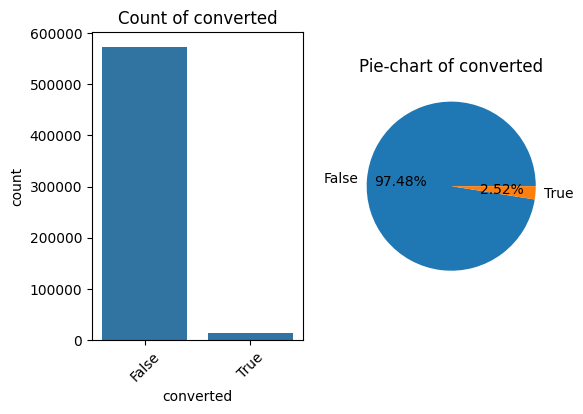

In [12]:
variable ='converted'

plt.figure(figsize = (6,4))

#Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, order=df_cat[variable].value_counts().index ,data=df_cat)
plt.title(f"Count of {variable}")
plt.xticks(rotation=45)

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title('Pie-chart of ' + variable)

Text(0.5, 1.0, 'Pie-chart of most ads day')

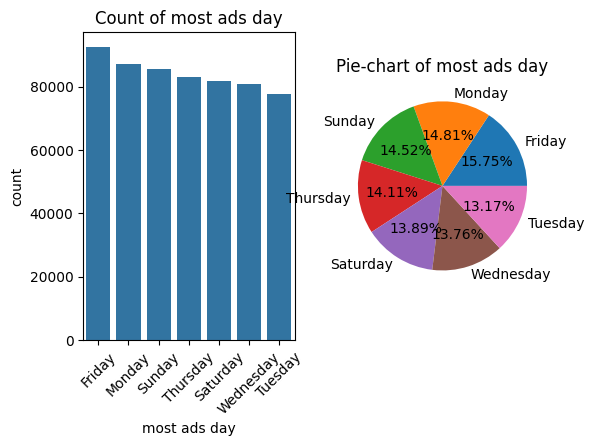

In [13]:
variable ='most ads day'

plt.figure(figsize = (6,4))

#Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, order=df_cat[variable].value_counts().index ,data=df_cat)
plt.title(f"Count of {variable}")
plt.xticks(rotation=45)

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title('Pie-chart of ' + variable)

Text(0.5, 1.0, 'Pie-chart of most ads hour')

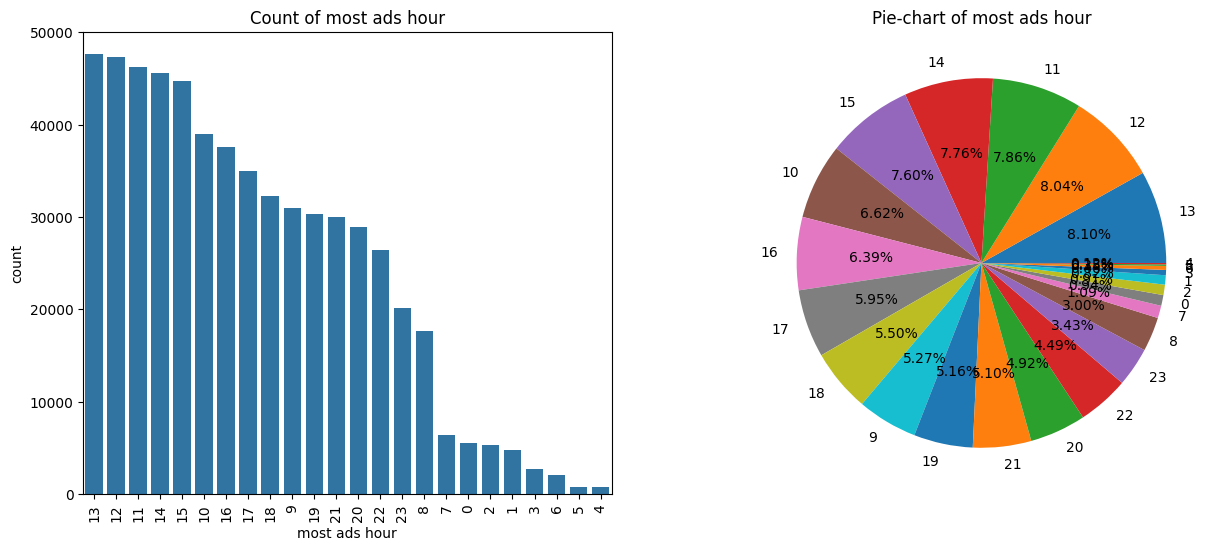

In [14]:
variable ='most ads hour'

plt.figure(figsize = (15,6))

#Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, order=df_cat[variable].value_counts().index ,data=df_cat)
plt.title(f"Count of {variable}")
plt.xticks(rotation=90)

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title('Pie-chart of ' + variable)

Text(0.5, 1.0, 'Box plot total ads')

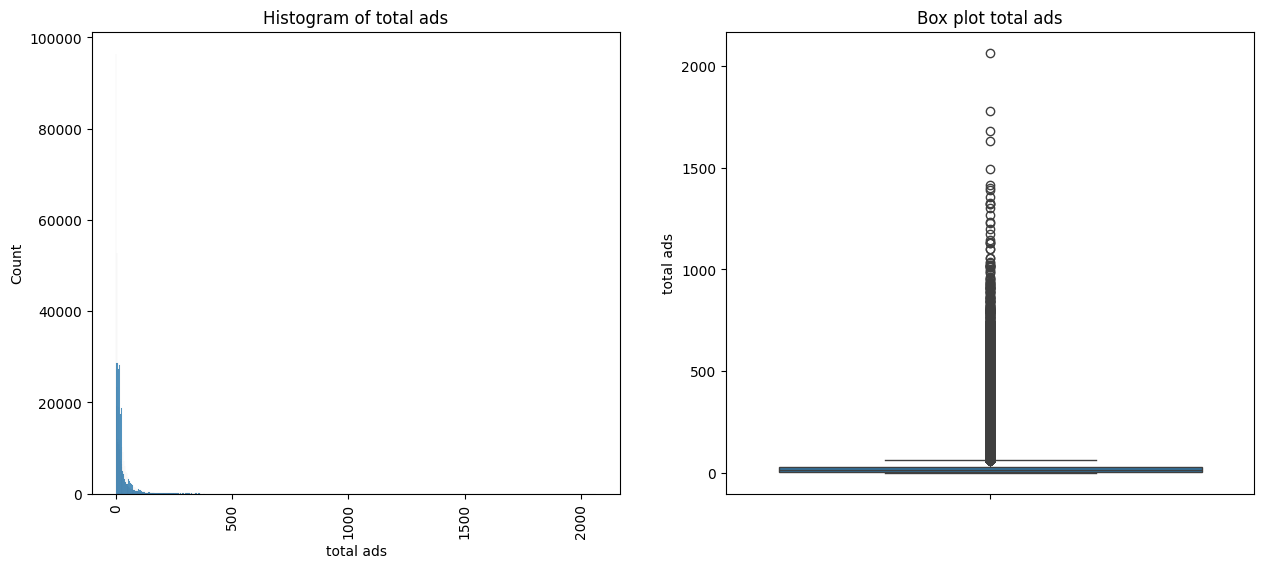

In [15]:
variable ='total ads'

plt.figure(figsize = (15,6))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable,data=df)
plt.title(f"Histogram of {variable}")
plt.xticks(rotation=90)

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title('Box plot ' + variable)

Text(0.5, 1.0, 'Box plot total ads')

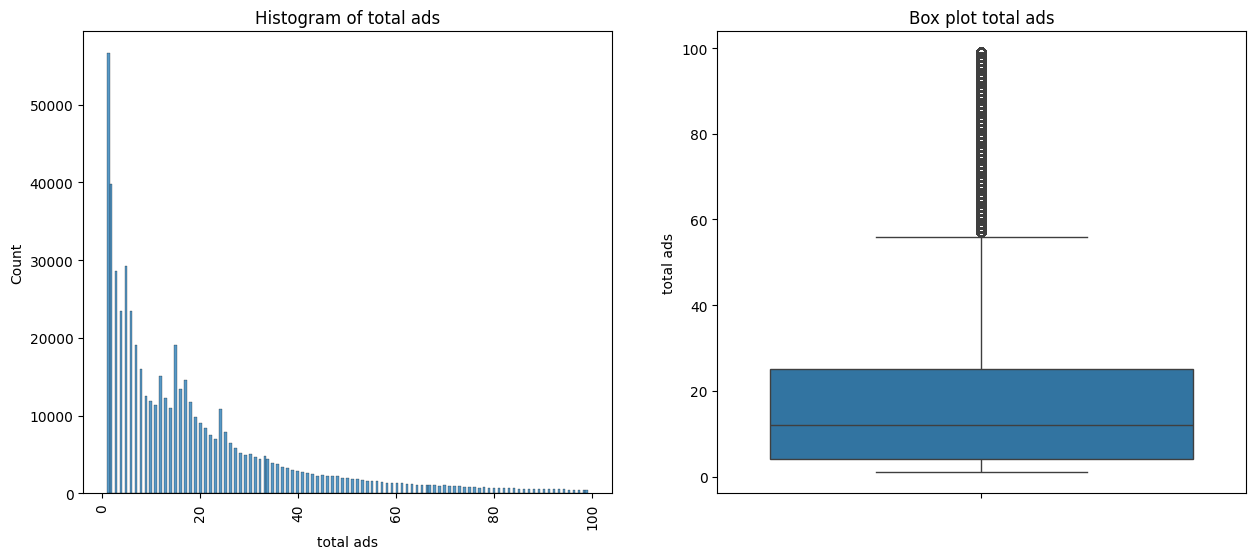

In [16]:
# Display the plot for total ads below 100
variable ='total ads'

plt.figure(figsize = (15,6))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable,data=df[df[variable] < 100])
plt.title(f"Histogram of {variable}")
plt.xticks(rotation=90)

#Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df[variable] < 100])
plt.title('Box plot ' + variable)

In [17]:
# Let's check the total ads
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [18]:
total_ads_more_than_2000 = df[df['total ads'] > 1000]

In [19]:
total_ads_more_than_2000.head()

,user id,test group,converted,total ads,most ads day,most ads hour
64,1261130,ad,False,1057,Thursday,20
107,1389878,ad,True,1328,Saturday,19
212,1555915,ad,False,1056,Friday,12
506,1086307,ad,False,1632,Friday,20
844,1445554,ad,False,1015,Friday,11


Bivariate Analysis

In [20]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [21]:
# Between the test group and the converted columns.
conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

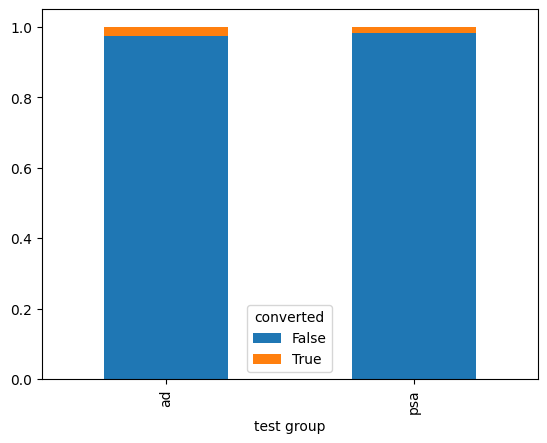

In [22]:
conversion_test_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

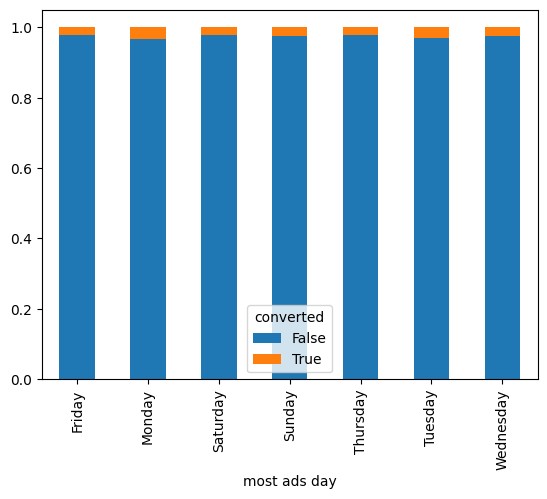

In [23]:
# Between the most ads day and the converted columns
conversion_most_ads_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(conversion_most_ads_day.sort_values(by=True, ascending=False))
conversion_most_ads_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

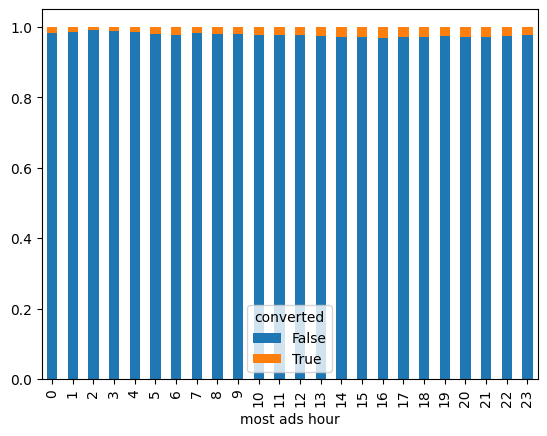

In [24]:
# Between the most ads hour and the converted columns
conversion_most_ads_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(conversion_most_ads_hour.sort_values(by=True, ascending=False))
conversion_most_ads_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

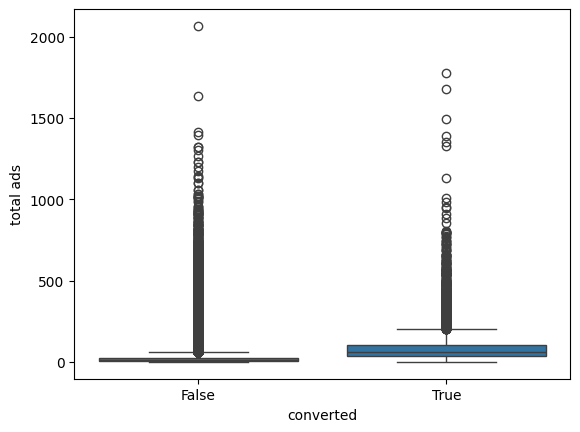

In [25]:
sns.boxplot(x='converted', y='total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

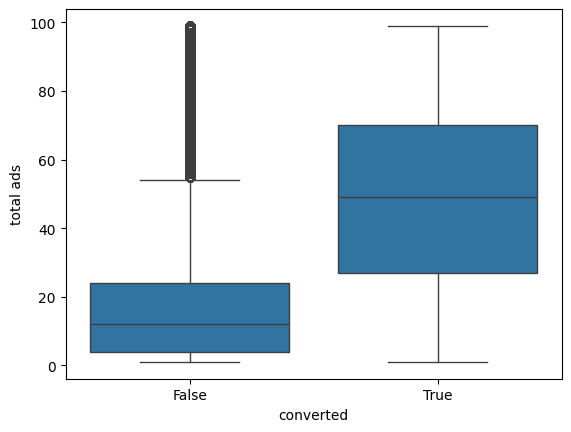

In [26]:
sns.boxplot(x='converted', y='total ads', data=df[df['total ads'] < 100])

Statistical test

In [27]:
from scipy.stats import chi2_contingency
alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        #Create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(df[variable], df['converted'])
        
        #Perform chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        #Display the results
        print(f"\nChi-squared test for {variable} vs converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p})")
        
        #Check for significant
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant where p < {alpha}")
            
        else:
            print(f"There is no significant difference in conversion rates across {variable} is where p > {alpha}")       
    


Chi-squared test for test group vs converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13)
The difference in conversion rates across test group is statistically significant where p < 0.05

Chi-squared test for most ads day vs converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85)
The difference in conversion rates across most ads day is statistically significant where p < 0.05

Chi-squared test for most ads hour vs converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77)
The difference in conversion rates across most ads hour is statistically significant where p < 0.05


In [28]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step1: Check Assumptioins
# Normality assummption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted']==False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variance assumption
levene_stat, levene_p_value = levene(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])

print(f"Levene's test for equlity of varaince: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 1.638680987007864e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430733551e-204
Levene's test for equlity of varaince: p-value = 0.0


In [29]:
# Step 2: Perform a Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # If both groups are normally disttributed and have equal variance, use t-test
    t_stat, t_p_value = ttest_ind(df[df['converted']==True]['total_ads'], df[df['converted']==False]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
    
else:
    # If either group is not normally distributed or variances are not equal, use Mann-Whitney U test
    mw_stat, mw_p_value = mannwhitneyu(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])
    print(f"Mann-Whitney U test: p-value = {mw_p_value}")

Mann-Whitney U test: p-value = 0.0


The difference between two group is strong based on the mw_p_value.

So, all factors seemed to be critical. 